<a href="https://colab.research.google.com/github/RojaCM/Sample-files/blob/main/Logistic%20Regression%20-%20titanic%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Logistic Regression
# one of the  machine learning model used for classification problems,especially for binary classification
# type of supervised machine learning model
# output values will be discrete values -(0,1),(pass,fail),(true,false),(yes,no)
# uses cases - 1.Loan sancation,2.spam filtering 3.EXAM results - pass,fail 4.customers segment 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from google.colab import files
uploaded = files.upload()

Saving titanic_train.csv to titanic_train.csv


In [6]:
dataset = pd.read_csv('titanic_train.csv')

In [7]:
dataset.shape

(891, 12)

In [9]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
#checking missing values
dataset.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [14]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

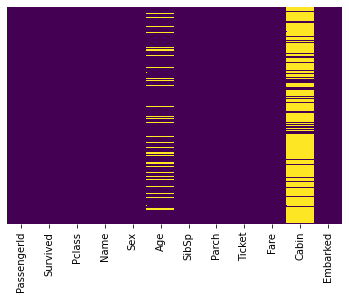

In [18]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


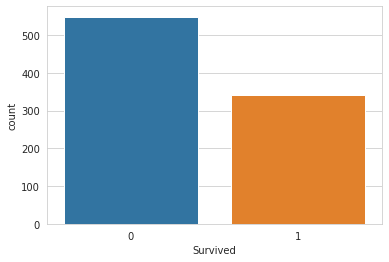

In [19]:
sns.set_style('whitegrid')
sns.countplot(dataset['Survived'])

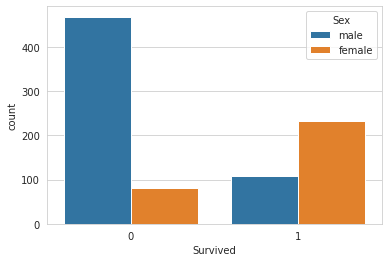

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=dataset)

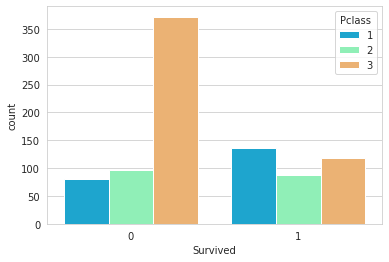

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=dataset,palette='rainbow')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


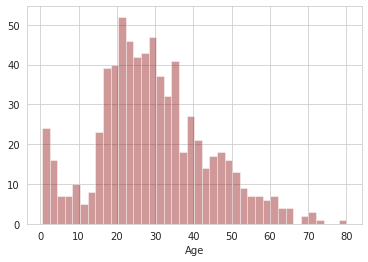

In [32]:
sns.distplot(dataset['Age'].dropna(),kde=False,color='darkred',bins=40)

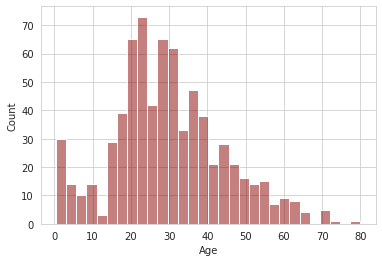

In [38]:
sns.histplot(dataset['Age'],bins=30,color='darkred',alpha=0.5)

In [40]:
#Data Cleaning
#We should fill the missing data of age values instead of dropping the age row.One way to fill the missing values for age column is by filling the average of the classes.
#We can caluclate the average age corresponding to each PClass by calculating BOXPLOT

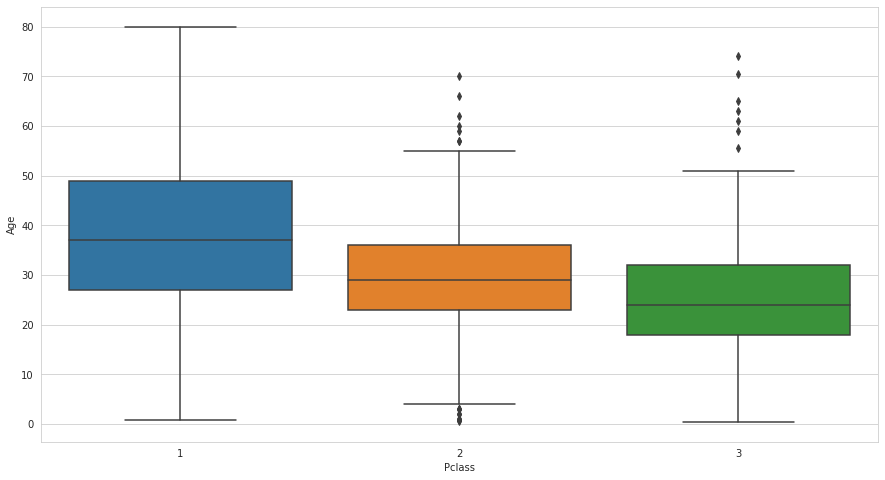

In [45]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Pclass',y='Age',data=dataset)

In [46]:
# we will use the average age values based on P class to fill the missing age values

In [47]:
def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]

  if pd.isnull(Age):

    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 27
    else:
      return 24
  else:
    return Age

In [48]:
dataset['Age'] = dataset[['Age','Pclass']].apply(impute_age,axis=1)

In [50]:
dataset['Age'].isnull().sum()

0

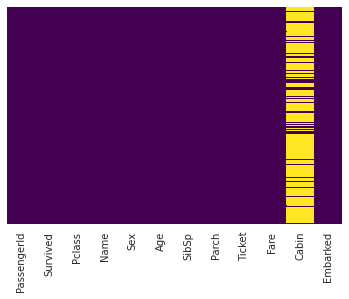

In [52]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [55]:
dataset.drop('Cabin',axis=1,inplace=True)

In [56]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [57]:
dataset.dropna(inplace=True)

In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [59]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [60]:
dataset['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '36973', '347088', 'PC 17605', '2661', 'C.A. 29395',
       'S.P. 3464', '3101281', '315151', 'C.A. 33111', 'S.O.C. 14879',
       '2680', '1601', '348123', '349208', '374746', '248738', '364516',
       '345767', '345779', '330932', '113059', 'SO/C 14885', '3101278',
       'W./C

In [64]:
dataset['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [67]:
dummies = pd.get_dummies(dataset['Embarked'],drop_first=True) 

In [68]:
dummies.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [69]:
dummies1 = pd.get_dummies(dataset['Sex'],drop_first=True)

In [70]:
dummies1.head()

,male
0,1
1,0
2,0
3,0
4,1


In [72]:
dataset.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [73]:
dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,24.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [80]:
dataset.drop(['male'],axis=1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1
1,2,1,1,38.0,1,0,71.2833,0,0
2,3,1,3,26.0,0,0,7.9250,0,1
3,4,1,1,35.0,1,0,53.1000,0,1
4,5,0,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,1
887,888,1,1,19.0,0,0,30.0000,0,1
888,889,0,3,24.0,1,2,23.4500,0,1
889,890,1,1,26.0,0,0,30.0000,0,0


In [81]:
dataset = pd.concat([dataset,dummies1,dummies],axis=1)

In [86]:
dataset.drop(['male','male','male','Q','S','male','Q','S'],axis=1,inplace=True)

In [88]:
dataset = pd.concat([dataset,dummies,dummies1],axis=1)

In [89]:
dataset

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,1,0,3,22.0,1,0,7.2500,0,1,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,1,0
3,4,1,1,35.0,1,0,53.1000,0,1,0
4,5,0,3,35.0,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,1,1
887,888,1,1,19.0,0,0,30.0000,0,1,0
888,889,0,3,24.0,1,2,23.4500,0,1,0
889,890,1,1,26.0,0,0,30.0000,0,0,1


In [93]:
x = dataset.drop('Survived',axis=1)

In [95]:
x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,1,3,22.0,1,0,7.2500,0,1,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,1,0
3,4,1,35.0,1,0,53.1000,0,1,0
4,5,3,35.0,0,0,8.0500,0,1,1


In [96]:
y = dataset['Survived']

In [97]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [100]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [101]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [102]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
y_pred = model.predict(x_test)

In [109]:
from sklearn.metrics import mean_squared_error,confusion_matrix,accuracy_score

In [105]:
mean_squared_error(y_test,y_pred)

0.18352059925093633

In [107]:
accuracy = confusion_matrix(y_test,y_pred)

In [108]:
accuracy

array([[148,  17],
       [ 32,  70]])

In [110]:
accuracy_score(y_test,y_pred)

0.8164794007490637

In [111]:
from sklearn.metrics import classification_report

In [113]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       165
           1       0.80      0.69      0.74       102

    accuracy                           0.82       267
   macro avg       0.81      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267

